# Marko Melishchuk Notebook Big Ideas Final Project

In [10]:
!git clone https://github.com/oliviat10/Final-Project-MOK.git

Cloning into 'Final-Project-MOK'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), done.


Marko's Notebook

My metric is Air Quality or more specifically amount of toxic waste released into the air (because the dataset focuses on that). I am going to calculate the amount of carcinogenic material released into the (it's exempted if the neighborhood is labeled as having clean air by the standard of the surveyors who complied this dataset). If a neighborhood has released toxic material that is unsafe into the air it loses points because clean air is an expectation for a family to live.

In [116]:
import numpy as np
import pandas as pd


air = pd.read_csv('toxicair.csv')


Imported my data file and imported pandas

In [117]:
air.head()

,TRI_FACILITY_ID,DOC_CTRL_NUM,FACILITY_NAME,STREET_ADDRESS,CITY_NAME,COUNTY_NAME,STATE_COUNTY_FIPS_CODE,STATE_ABBR,ZIP_CODE,REGION,...,NAICS_CODES,INDUSTRY_CODE,SRS_ID,PFAS_IND,ENVIRONMENTAL_MEDIUM,RELEASE_RANGE_CODE,TOTAL_RELEASE,REL_EST_AMT,RELEASE_NA,RELEASE_BASIS_EST_CODE
0,15025SSCLR400ST,1396100016272,USS-CLAIRTON PLANT,400 STATE ST MS 71,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,331,14183.0,0,AIR FUG,NaN,380.0,380.0,0,O
1,15025SSCLR400ST,1396100016272,USS-CLAIRTON PLANT,400 STATE ST MS 71,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,331,14183.0,0,AIR STACK,NaN,0.0,0.0,0,O
2,15106THHMM235HO,1387010137127,O HOMMEL CO,235 HOPE ST,CARNEGIE,ALLEGHENY,42003,PA,15106,3,...,NaN,325,149583.0,0,AIR FUG,NaN,NaN,0.0,0,O
3,15106THHMM235HO,1387010137127,O HOMMEL CO,235 HOPE ST,CARNEGIE,ALLEGHENY,42003,PA,15106,3,...,NaN,325,149583.0,0,AIR STACK,NaN,1784.0,1784.0,0,O
4,15025SSCLR400ST,1392065615205,USS-CLAIRTON PLANT,400 STATE ST MS 71,CLAIRTON,ALLEGHENY,42003,PA,15025,3,...,NaN,331,5090.0,0,AIR FUG,NaN,16000.0,16000.0,0,E


Showing the beginning of the chart to give a few examples of the dataset we are looking at

In [118]:
a_release = air['TOTAL_RELEASE'].sum()
print(a_release)

136976755.5773927


The line of code above sums the weight of all the total chemicals that have been released into Allegheny County Air over the past 30 years, which comes out to an astounding large number (in lbs)

In [119]:
air.shape

(25536, 38)

This describes the shape of the data so we know just how big the dataset really is

The total amount (in pounds) of the toxic chemical released to air, water, land, and underground injection wells during the calendar year (January 1 - December 31). This means that there are 136976755.5773927 lbs of toxic chemicals released into the air (so far).

Below: This line of code shows quite how many different toxic chemicals there are in the air by checking the names of the chemical compound listed in the category chemical

In [120]:
air['CHEM_NAME'].unique()

array(['Biphenyl', 'Lead', 'Ethylene', 'Naphthalene', 'Methanol',
       'Cresol (mixed isomers)', 'Ethyl acrylate', 'Toluene',
       'Cyanide compounds', 'Acetone', 'p-Cresol', 'Anthracene',
       'Barium compounds (except for barium sulfate (CAS No. 7727-43-7))',
       'Acrylic acid', 'Titanium tetrachloride', '1,2,4-Trimethylbenzene',
       'Phthalic anhydride', 'Maleic anhydride', 'Dibenzofuran',
       'Sodium hydroxide (solution)',
       'Nitrate compounds (water dissociable; reportable only when in aqueous solution)',
       'Ethylene glycol', 'Xylene (mixed isomers)',
       'Sulfuric acid (acid aerosols including mists, vapors, gas, fog, and other airborne forms of any particle size)',
       'Phosphoric acid', 'Zinc compounds',
       'Chromium compounds (except for chromite ore mined in the Transvaal Region)',
       'Nickel compounds', 'Certain glycol ethers', 'n-Butyl alcohol',
       'Butyl acrylate', 'p-Xylene', 'Ethylbenzene',
       'Molybdenum trioxide', 'Copper 

In [121]:
len(air['CHEM_NAME'].unique())

175

The above line counts how many different chemicals I just listed. There are 175 different chemicals or chemical compounds being released into the air currently

In [122]:
len(air['CITY_NAME'].unique())

49

The above line of code counts how many different neighborhoods there are listed which could give a little insight to how widespread the problem is. It's not necessarily a few neighborhoods releasing a lot into the air but it could be many neighborhoods releasing a little. But for calculating each neighborhood I will be going by zipcode/combination of zipcodes that make up a neighborhood

In [123]:
air['TOTAL_RELEASE'].describe()

count    1.709100e+04
mean     8.014555e+03
std      6.910453e+04
min      0.000000e+00
25%      4.000000e+00
50%      1.222000e+02
75%      1.494000e+03
max      2.600800e+06
Name: TOTAL_RELEASE, dtype: float64

The above code shows some basic statistical analysis on the data and it counts how many instances of toxic chemical release there were

There are 17091 different releases of toxic gases (many come from multiple plants/facilities, it's not 17091 different facilities)

In [124]:
num_fac = len(air['FACILITY_NAME'].unique())
num_fac

204

This line shows us how many different facilities there are that are releasing toxic chemicals into the air

The line of code below cuts down the dataset to only the most important columns we need to determine the amount of toxic chemicals released into the air

In [125]:
a_done = air.drop(columns = ['TRI_FACILITY_ID', 'DOC_CTRL_NUM','STATE_ABBR','STATE_COUNTY_FIPS_CODE','NAICS_CODES','PFAS_IND','RELEASE_RANGE_CODE',
                    'ENVIRONMENTAL_MEDIUM','RELEASE_BASIS_EST_CODE','STREET_ADDRESS', 'REGION','RELEASE_NA','ENVIRONMENTAL_MEDIUM','SRS_ID',
                   'INDUSTRY_CODE','COUNTY_NAME','TOTAL_RELEASE','FACILITY_NAME','CITY_NAME','ASGN_FEDERAL_IND','ASGN_AGENCY',
                    'PARENT_CO_DB_NUM','STANDARDIZED_PARENT_COMPANY','EPA_REGISTRY_ID','TRADE_SECRET_IND','FAC_CLOSED_IND','PARENT_CO_NAME','REPORTING_YEAR',
                   'CAS_NUM','ELEMENTAL_METAL_INCLUDED','CHEM_NAME','LIST_3350','PRIMARY_SIC_CODE','SIC_CODES','PRIMARY_NAICS_CODE'])
a_done

,ZIP_CODE,CARCINOGEN,CLEAN_AIR,REL_EST_AMT
0,15025,N,Y,380.000
1,15025,N,Y,0.000
2,15106,Y,Y,0.000
3,15106,Y,Y,1784.000
4,15025,N,N,16000.000
...,...,...,...,...
25531,15025,Y,Y,1.146
25532,15225,N,Y,1.000
25533,15225,N,Y,1.000
25534,15014,Y,Y,250.000


Now this chart is narrowed down to four different catergories, being: Zip code, Carcinogen (a substance that is defined as something that can cause cancer to humans), Clean air, and Relistic Estimated Amount. The way I will narrow down whether or a substance is dangerous is if the answer to the question of clean air is no (N in the chart) OR is the answer to is a carcinogen is yes (Y in the carcinogen category). If the category of CLEAN_AIR is marked as yes (Y) then I won't say that the release of chemicals is dangerous because it has been determined by the surveyors that the air is clean (even if the chemcial being released is a carcinogen). Then I will have a chart which I will sum the total amount of toxic chemicals released (when it's deemed that they make the air "unclean") by zip code and rank zip codes by amount of toxic chemicals released.

After filtering this all out I created multiple query masks to filter out the facilites that aren't releasing dangerous chemicals into the air.
To do this I create 3 groups that I will filter by: are there carcinogens released (they do not have to be in the air for the release to be marked as yes, but if the air is deemed clean then the release of chemicals isn't going into the air, it's just going somewhere else) is the air determined to be clean, and if there is a release of toxic chemicals into the air is it a large amount

This code checks if the release is a carcinogen

In [126]:
query_mask = a_done['CARCINOGEN'] != 'N'
query_mask.head(5)

0    False
1    False
2     True
3     True
4    False
Name: CARCINOGEN, dtype: bool

If it is it's kept. Example

In [127]:
car_no = a_done[query_mask]
car_no.head(10)

,ZIP_CODE,CARCINOGEN,CLEAN_AIR,REL_EST_AMT
2,15106,Y,Y,0.0
3,15106,Y,Y,1784.0
6,15225,Y,Y,250.0
7,15225,Y,Y,250.0
12,15144,Y,Y,0.0
13,15144,Y,Y,3200.0
58,15122,Y,Y,0.0
59,15122,Y,Y,9.0
82,15144,Y,Y,5.0
83,15144,Y,Y,898.0


The above snippet removes all the non-carcinogens but now I also have to remove the rows in which the air is deemed clean, because that air is up to par. So I'm going to create another query mask to only accept rows in which the air is marked as not clean or (N)

In [128]:
qquery_mask = a_done['CLEAN_AIR'] == 'N'
qquery_mask.head()

0    False
1    False
2    False
3    False
4     True
Name: CLEAN_AIR, dtype: bool

Now I'm going to create a third query mask to check for releases over a sizeable margin (100 lbs released) and anything less than that will be removed

In [129]:
qqquery_mask = a_done['REL_EST_AMT'] >= 100
qqquery_mask.head()

0     True
1    False
2    False
3     True
4     True
Name: REL_EST_AMT, dtype: bool

In [130]:
final = a_done[(query_mask & qquery_mask) & qqquery_mask]
final.head(100)

,ZIP_CODE,CARCINOGEN,CLEAN_AIR,REL_EST_AMT
4893,15025,Y,N,1300.0
7482,15025,Y,N,230.0
7483,15025,Y,N,1613.0
8442,15025,Y,N,185.0
8443,15025,Y,N,1085.0
8942,15144,Y,N,250.0
8943,15144,Y,N,250.0
18812,15144,Y,N,250.0
20735,15025,Y,N,1430.0


After applying the 3 query masks it is clear that there are two zip codes in particular that release large amounts of carcinogenic material into the air to make it unsafe. The two zip codes correspond to Clairton and Springdale

In [131]:
rquery_mask = a_done['REL_EST_AMT'] >= 1

final_all_n = a_done[(query_mask & qquery_mask) & rquery_mask]
final_all_n

,ZIP_CODE,CARCINOGEN,CLEAN_AIR,REL_EST_AMT
4515,15144,Y,N,13.0
4893,15025,Y,N,1300.0
5406,15204,Y,N,1.0
5407,15204,Y,N,2.0
6377,15144,Y,N,55.0
6450,15204,Y,N,5.0
6451,15204,Y,N,5.0
7482,15025,Y,N,230.0
7483,15025,Y,N,1613.0
8442,15025,Y,N,185.0


After changing the third query mask to show all toxic releases a new zip code that releases small amounts of material (just more often) is 15204 which corresponds to Sheraden and another that releases 2 lbs twice 15225 which corresponds to Neville Island

Below I'm just going to remove the labels for clean air and carcinogen and then I'm going to plot the values on a bar graph

In [132]:
fin = final_all_n.drop(columns = ['CARCINOGEN','CLEAN_AIR'])
fin

,ZIP_CODE,REL_EST_AMT
4515,15144,13.0
4893,15025,1300.0
5406,15204,1.0
5407,15204,2.0
6377,15144,55.0
6450,15204,5.0
6451,15204,5.0
7482,15025,230.0
7483,15025,1613.0
8442,15025,185.0


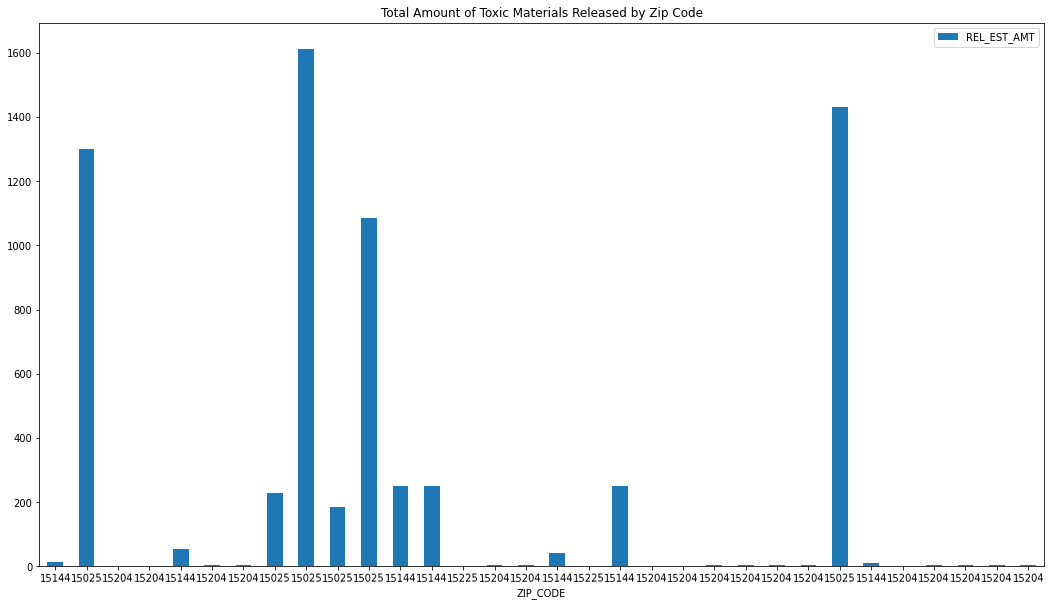

In [133]:
fin.plot.bar(figsize=(18,10), x='ZIP_CODE', y='REL_EST_AMT',rot=1, title="Total Amount of Toxic Materials Released by Zip Code")


This above bar graph is really ugly because it plots each instance of the release and it doesn't organize the by zip code

To split it up by zip code I created a query mask for each of the neighborhoods and then I separated the neighborhoods.

In [134]:
Clairton_query_mask = fin['ZIP_CODE'] != 15025
Springdale_query_mask = fin['ZIP_CODE'] != 15144
Sheraden_query_mask = fin['ZIP_CODE'] != 15204
Neville_query_mask = fin['ZIP_CODE'] != 15225

In [135]:
Clairton = fin[Springdale_query_mask & Sheraden_query_mask & Neville_query_mask]
#Clairton neighborhood totals below
Clairton

,ZIP_CODE,REL_EST_AMT
4893,15025,1300.0
7482,15025,230.0
7483,15025,1613.0
8442,15025,185.0
8443,15025,1085.0
20735,15025,1430.0


In [136]:
Clairton = Clairton.drop(columns = ['ZIP_CODE'])
Clairton.sum()

REL_EST_AMT    5843.0
dtype: float64

In [137]:
Springdale = fin[Clairton_query_mask & Sheraden_query_mask & Neville_query_mask]
#Springdale neighborhood totals below
Springdale

,ZIP_CODE,REL_EST_AMT
4515,15144,13.0
6377,15144,55.0
8942,15144,250.0
8943,15144,250.0
16013,15144,42.0
18812,15144,250.0
20821,15144,11.0


In [138]:
Springdale = Springdale.drop(columns = ['ZIP_CODE'])
Springdale.sum()

REL_EST_AMT    871.0
dtype: float64

In [139]:
Sheraden = fin[Springdale_query_mask & Clairton_query_mask & Neville_query_mask]
#Sheraden neighborhood totals below
Sheraden

,ZIP_CODE,REL_EST_AMT
5406,15204,1.0
5407,15204,2.0
6450,15204,5.0
6451,15204,5.0
15656,15204,5.0
15657,15204,5.0
19090,15204,1.0
19091,15204,1.0
19388,15204,5.0
19389,15204,5.0


In [140]:
Sheraden = Sheraden.drop(columns = ['ZIP_CODE'])
Sheraden.sum()

REL_EST_AMT    66.0
dtype: float64

In [141]:
Neville = fin[Springdale_query_mask & Sheraden_query_mask & Clairton_query_mask]
#Neville Island neighborhood totals below
Neville

,ZIP_CODE,REL_EST_AMT
11093,15225,2.0
18367,15225,2.0


In [142]:
Neville = Neville.drop(columns = ['ZIP_CODE'])
Neville.sum()

REL_EST_AMT    4.0
dtype: float64

Now that I've got all my totals I'm going to organize the totals into a dataframe so I can easily plot this onto a graph

In [143]:
totals = pd.DataFrame({"Amount Released":[5843,871,66,4],
                    "Neighborhoods":["Clairton","Springdale","Sheraden","Neville Island"]},index=[1,2,3,4])
totals

,Amount Released,Neighborhoods
1,5843,Clairton
2,871,Springdale
3,66,Sheraden
4,4,Neville Island


Now I'm going to set up my bar graph based on the dataframe above

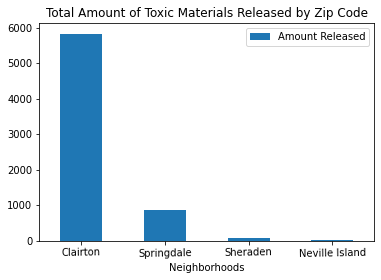

In [144]:
totals.plot.bar(x='Neighborhoods', y='Amount Released',rot=1, title="Total Amount of Toxic Materials Released by Zip Code")

Since air quality or amount of toxic chemicals released into the air isn't as important of a quality of a neighborhood as crime or diversity in education I'm subtracting but only by a relatively small amount because compared to crime and diversity in schools, air quality isn't a family's first priority for where they're going to live.

Total releases and score subtractions Lbs released / 10,000

Clairton with 5843 lbs released -.5843

Springdale with 871 lbs released   -.0871

Sheraden with 66 lbs released   -.0066

Neville Island with 4 lbs released   -.0004

# Conclusion
There are only 4 neighborhoods that release amounts of toxic chemicals that are worth remarking and those four zip codes are 15144, 15025, 15225, 15204. These four zip codes are Springdale, Clairton, Neville Island and Sheraden. Clairton is the biggest culprit as they release will over 5 times the combined rest of Pittsburgh so if air quality is something that matters to you then Clairton is a place to avoid. The metric of air quality is a little bit different especially in terms of release amount. The best is 0 and you can't do better than 0 so there aren't winners that stand out, mainly 4 losers. So, I subtracted points from the losers instead of adding to the winners.